# Análise exploratória de dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Coleta de Dados

In [2]:
CAMINHO_CSV = '../data/raw/Orange_Quality_Data.csv'
df = pd.read_csv(CAMINHO_CSV)

In [3]:
df.head()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5


_Mostra as 5 primeiras linhas do dataframe._

# 2. Descrição dos Dados

### O conjunto de dados tabular contém atributos numéricos que descrevem a qualidade das laranjas, incluindo tamanho, peso, doçura (Brix), acidez (pH), maciez, época de colheita e maturação, bem como atributos categóricos como cor, variedade, presença de manchas. e qualidade geral.
#### Adicionar mais informação?

## 2.1 Dicionario de Dados

In [4]:
dicionario = pd.DataFrame([
    {
        "variavel": "Size",
        "descricao": "Tamanho  da fruta(cm)",
        "tipo":"quantitativa",
        "subtipo":"continua"
    },{
        "variavel": "Weigth",
        "descricao": "Peso",
        "tipo":"quantitativa",
        "subtipo":"continua"
    },{
        "variavel": "Brix",
        "descricao": "Nível de doçura em Brix",
        "tipo":"quantitativa",
        "subtipo":"continua"
    },{
        "variavel": "pH",
        "descricao": "Nível de acidez (pH)",
        "tipo":"quantitativa",
        "subtipo":"continua"
    },{
        "variavel": "Softness",
        "descricao": "Classificação de suavidade (1-5)",
        "tipo":"quantitativa",
        "subtipo":"continua"
    },{
        "variavel": "HarvestTime",
        "descricao": "Dias desde a colheita",
        "tipo":"quantitativa",
        "subtipo":"nominal"
    },{
        "variavel": "Ripeness",
        "descricao": "Maturação",
        "tipo":"quantitativa",
        "subtipo":"discreta"
    },{
        "variavel": "Color",
        "descricao": "Cor da fruta",
        "tipo":"qualitativa",
        "subtipo":"nominal"
    },{
        "variavel": "Variety",
        "descricao": "Variedade Laranja",
        "tipo":"qualitativa",
        "subtipo":"nominal"
    },{
        "variavel": "Blemishes",
        "descricao": "Presença de manchas",
        "tipo":"qualitativa",
        "subtipo":"booleano"
    },{
        "variavel": "Quality",
        "descricao": "Qualidade geral da fruta",
        "tipo":"quantitativa",
        "subtipo":"discreta"
    }
])
dicionario.to_csv('../data/external/dictionary.csv', index=False)
dicionario

,variavel,descricao,tipo,subtipo
0,Size,Tamanho da fruta(cm),quantitativa,continua
1,Weigth,Peso,quantitativa,continua
2,Brix,Nível de doçura em Brix,quantitativa,continua
3,pH,Nível de acidez (pH),quantitativa,continua
4,Softness,Classificação de suavidade (1-5),quantitativa,continua
5,HarvestTime,Dias desde a colheita,quantitativa,nominal
6,Ripeness,Maturação,quantitativa,discreta
7,Color,Cor da fruta,qualitativa,nominal
8,Variety,Variedade Laranja,qualitativa,nominal
9,Blemishes,Presença de manchas,qualitativa,booleano


 _Temos no total 11 variáveis de estudo, sendo 8 quantitativas e 3 qualitativas._

<hr>

<h2>Analise inicial:</h2>
<h4>Aqui buscaremos as informações iniciais dos nossos dados, como: </h4> 
<ul>
 <li>Características das colunas e das linhas.</li>
 <li>Valores como média, frequência, mínimos e máximos</li>
 <li>Valores de exemplo</li>
</ul>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Size (cm)           241 non-null    float64
 1   Weight (g)          241 non-null    int64  
 2   Brix (Sweetness)    241 non-null    float64
 3   pH (Acidity)        241 non-null    float64
 4   Softness (1-5)      241 non-null    float64
 5   HarvestTime (days)  241 non-null    int64  
 6   Ripeness (1-5)      241 non-null    float64
 7   Color               241 non-null    object 
 8   Variety             241 non-null    object 
 9   Blemishes (Y/N)     241 non-null    object 
 10  Quality (1-5)       241 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 20.8+ KB


In [6]:
df.describe()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Quality (1-5)
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,7.844813,205.128631,10.907884,3.473900,3.072614,15.344398,3.599585,3.817427
std,1.086002,56.461012,2.760446,0.421007,1.323630,5.323852,1.205214,1.014410
min,6.000000,100.000000,5.500000,2.800000,1.000000,4.000000,1.000000,1.000000
25%,6.900000,155.000000,8.500000,3.200000,2.000000,11.000000,3.000000,3.000000
50%,7.800000,205.000000,11.000000,3.400000,3.000000,15.000000,4.000000,4.000000
75%,8.700000,252.000000,13.400000,3.800000,4.000000,20.000000,4.500000,4.500000
max,10.000000,300.000000,16.000000,4.400000,5.000000,25.000000,5.000000,5.000000


In [7]:
print( f'Nossa tabela possui: {df.shape}')

Nossa tabela possui: (241, 11)


<hr>

## Analise estátistica:

- Mediana e Desvio Padrão:
    A mediana é uma medida de tendência central que representa o valor no centro de um conjunto de dados quando eles são ordenados em ordem crescente ou decrescente. Ao contrário da média, a mediana não é influenciada por valores extremos, tornando-se uma medida confiável da posição central dos dados.
    O desvio padrão é a medida do quão distante estão os valores da média.

In [8]:
Mediana = df['Quality (1-5)'].median()
Media = df['Quality (1-5)'].mean()
Percenti = df['Quality (1-5)'].quantile(q=0.75)
desvio_padrao = df['Quality (1-5)'].std()
print(f'Media:{Media} \n Mediana: {Mediana} \n Desvio padrão: {desvio_padrao}')
print(f'90% das laranjas possuem qualidade até {Percenti}')

Media:3.8174273858921164 
 Mediana: 4.0 
 Desvio padrão: 1.01441034797572
90% das laranjas possuem qualidade até 4.5


<hr>

In [9]:
brix = df.loc[df['Brix (Sweetness)'] >= 13,['Ripeness (1-5)', 'Brix (Sweetness)']]
display(brix)

,Ripeness (1-5),Brix (Sweetness)
2,5.0,14.0
7,4.5,13.5
11,3.0,14.8
15,5.0,14.5
17,1.0,14.1
...,...,...
224,5.0,13.0
225,3.0,14.6
226,2.0,14.5
230,2.0,15.6


# Filtragem dos dados: Busca por valores nulos

In [10]:
df.isnull().sum()

Size (cm)             0
Weight (g)            0
Brix (Sweetness)      0
pH (Acidity)          0
Softness (1-5)        0
HarvestTime (days)    0
Ripeness (1-5)        0
Color                 0
Variety               0
Blemishes (Y/N)       0
Quality (1-5)         0
dtype: int64

## Analise sobre a variedade das laranjas

In [11]:
valores_unicos = df['Variety'].unique()
quantidade_valores_unicos = len(valores_unicos)
print("Valores diferentes dentro da variavel:", quantidade_valores_unicos)
display("Os valores:", valores_unicos)

Valores diferentes dentro da variavel: 24


'Os valores:'

array(['Valencia', 'Navel', 'Cara Cara', 'Blood Orange', 'Hamlin',
       'Tangelo (Hybrid)', 'Murcott (Hybrid)', 'Moro (Blood)', 'Jaffa',
       'Clementine', 'Washington Navel', 'Star Ruby', 'Tangerine',
       'Ambiance', 'California Valencia', 'Honey Tangerine',
       'Navel (Late Season)', 'Clementine (Seedless)', 'Temple',
       'Minneola (Hybrid)', 'Satsuma Mandarin', 'Midsweet (Hybrid)',
       'Navel (Early Season)', 'Ortanique (Hybrid)'], dtype=object)

In [12]:
mapeamento = {
    'Valencia' : 1,
    'Navel' : 2,
    'Cara Cara' : 3,
    'Blood Orange': 4,
    'Hamlin' : 5,
    'Tangelo (Hybrid)' : 6,
    'Murcott (Hybrid)' : 7,
    'Moro (Blood)' : 8,
    'Jaffa' : 9,
    'Clementine' : 10,
    'Washington Navel': 11,
    'Star Ruby' : 12,
    'Tangerine' : 13,
    'Ambiance' : 14,
    'California Valencia' : 15,
    'Honey Tangerine' : 16,
    'Navel (Late Season)' : 17,
    'Clementine (Seedless)' : 18,
    'Temple' : 19,
    'Minneola (Hybrid)' : 20,
    'Satsuma Mandarin' : 21,
    'Midsweet (Hybrid)' : 22,
    'Navel (Early Season)' : 23,
    'Ortanique (Hybrid)': 24,
}

_Acima um dicionario foi criado para mapear as variedades das laranjas, coluna "Variety"._<br>
_Após criar o dicionário, logo abaixo, foi criado uma nova coluna "Índice Variety" com este mapeamento._

In [13]:
df['Índice Variety'] = df['Variety'].map(mapeamento)
display(df)

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5),Índice Variety
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0,1
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5,2
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0,3
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5,4
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,Orange-Red,Tangerine,Y (Scars),5.0,13
237,7.4,275,8.5,3.5,5.0,20,5.0,Light Orange,Minneola (Hybrid),N,4.0,20
238,7.5,196,15.7,3.0,3.0,13,3.0,Deep Orange,Temple,Y (Minor Insect Damage),5.0,19
239,7.2,251,9.8,4.3,3.0,23,1.0,Light Orange,Moro (Blood),Y (Minor Insect Damage),3.0,8


## Colocar essa parte la para baixo. seria como um resultado provisorio das analises.

In [14]:
variedades_qualidade = df[['Variety', 'Quality (1-5)']].values.tolist()

print("Variedades de Laranja e suas Notas de Qualidade:")
for variedade, qualidade in variedades_qualidade:
    print(f"{variedade}: {qualidade}")

Variedades de Laranja e suas Notas de Qualidade:
Valencia: 4.0
Navel: 4.5
Cara Cara: 5.0
Blood Orange: 3.5
Hamlin: 4.5
Navel: 1.0
Tangelo (Hybrid): 4.0
Murcott (Hybrid): 4.5
Moro (Blood): 3.0
Jaffa: 5.0
Cara Cara: 2.5
Valencia: 4.0
Clementine: 4.5
Washington Navel: 5.0
Star Ruby: 4.0
Tangerine: 5.0
Ambiance: 3.5
Cara Cara: 4.0
Clementine: 2.0
Jaffa: 4.5
Blood Orange: 3.0
Murcott (Hybrid): 5.0
California Valencia: 4.5
Moro (Blood): 2.0
Honey Tangerine: 4.5
Navel (Late Season): 4.0
Clementine (Seedless): 5.0
Cara Cara: 4.0
Temple: 1.0
Cara Cara: 3.0
Hamlin: 4.5
Minneola (Hybrid): 4.5
Temple: 5.0
Moro (Blood): 4.0
Satsuma Mandarin: 5.0
Midsweet (Hybrid): 3.5
California Valencia: 5.0
Cara Cara: 2.5
Navel (Early Season): 4.5
Ambiance: 4.0
Star Ruby: 4.5
Tangerine: 5.0
Ortanique (Hybrid): 4.5
Washington Navel: 5.0
Clementine (Seedless): 5.0
Jaffa: 5.0
Cara Cara: 4.5
Hamlin: 4.5
Moro (Blood): 3.0
Temple: 5.0
Midsweet (Hybrid): 3.5
Satsuma Mandarin: 5.0
California Valencia: 4.5
Cara Cara: 2.0


In [15]:
media_qualidade = df.groupby('Variety')['Quality (1-5)'].mean()
print("Variedades de Laranja e a Média de Qualidade:")
for variedade, media in media_qualidade.items():
    print(f"{variedade}: {media:.2f}")


Variedades de Laranja e a Média de Qualidade:
Ambiance: 3.95
Blood Orange: 3.25
California Valencia: 4.71
Cara Cara: 3.19
Clementine: 3.68
Clementine (Seedless): 5.00
Hamlin: 4.20
Honey Tangerine: 4.21
Jaffa: 4.00
Midsweet (Hybrid): 3.50
Minneola (Hybrid): 3.54
Moro (Blood): 3.53
Murcott (Hybrid): 4.83
Navel: 3.28
Navel (Early Season): 4.50
Navel (Late Season): 4.00
Ortanique (Hybrid): 4.08
Satsuma Mandarin: 4.04
Star Ruby: 3.61
Tangelo (Hybrid): 4.00
Tangerine: 4.36
Temple: 3.64
Valencia: 3.86
Washington Navel: 4.00


_Acima vemos a média de cada variedade de laranja "Variety", comparada com a sua qualidade "Quality (1-5)"._

In [16]:
contagem_variedades = df['Variety'].value_counts()

clementine_count = contagem_variedades['Clementine (Seedless)']

print("Contagem de Clementine:", clementine_count)


Contagem de Clementine: 4


In [17]:
contagem_variedades = df['Variety'].value_counts()

print("Contagem de todas as variedades:")
print(contagem_variedades)

Contagem de todas as variedades:
Cara Cara                21
Temple                   18
Star Ruby                18
Navel                    16
Moro (Blood)             16
Tangerine                14
Clementine               14
Washington Navel         14
Satsuma Mandarin         13
Ortanique (Hybrid)       13
Minneola (Hybrid)        12
Jaffa                    11
Ambiance                 11
Valencia                 11
California Valencia       7
Honey Tangerine           7
Hamlin                    5
Midsweet (Hybrid)         5
Clementine (Seedless)     4
Murcott (Hybrid)          3
Navel (Late Season)       3
Blood Orange              2
Navel (Early Season)      2
Tangelo (Hybrid)          1
Name: Variety, dtype: int64


_Vemos acima quantas ocorrências temos para cada variedade de laranja "Variety"._

In [18]:
df_apenas_maiores_11 = contagem_variedades[contagem_variedades >= 11].index

print("Variedades com contagem de 11 ou mais:")
print(df_apenas_maiores_11)

Variedades com contagem de 11 ou mais:
Index(['Cara Cara', 'Temple', 'Star Ruby', 'Navel', 'Moro (Blood)',
       'Tangerine', 'Clementine', 'Washington Navel', 'Satsuma Mandarin',
       'Ortanique (Hybrid)', 'Minneola (Hybrid)', 'Jaffa', 'Ambiance',
       'Valencia'],
      dtype='object')


## Até aqui!!

# Analise Grafica

In [19]:
mediana_doçura_por_variedade = df.groupby('Índice Variety')['Brix (Sweetness)'].median()

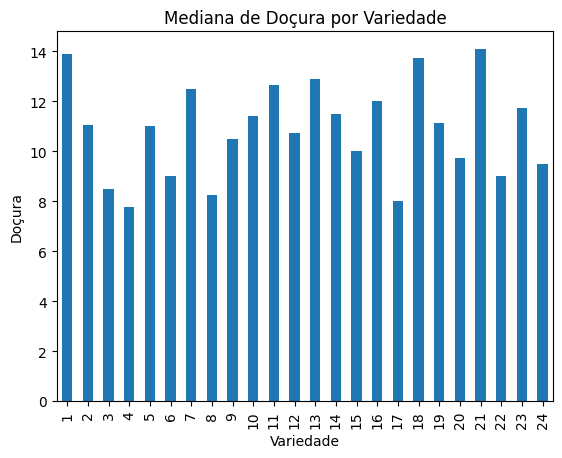

In [20]:
mediana_doçura_por_variedade.plot(kind='bar')
plt.title('Mediana de Doçura por Variedade')
plt.xlabel('Variedade')
plt.ylabel('Doçura')
plt.show()

_Este gráfico de barra nos mostra a mediana da relação, teor de açúcar "Brix (Sweetness)" compara com a variedade das laranjas "Índice Variety"._

<hr>

## Contagem

Text(0.5, 1.0, 'Count of Oranges by Color')

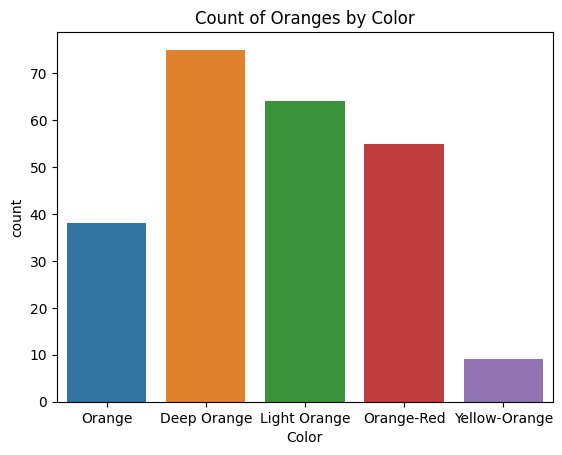

In [21]:
sns.countplot(data=df,x="Color")
plt.title("Count of Oranges by Color")  # Será que a cor da laranja tem relação com algum fator?

<hr>

## Analise dos histogramas

<Axes: xlabel='Quality (1-5)', ylabel='Count'>

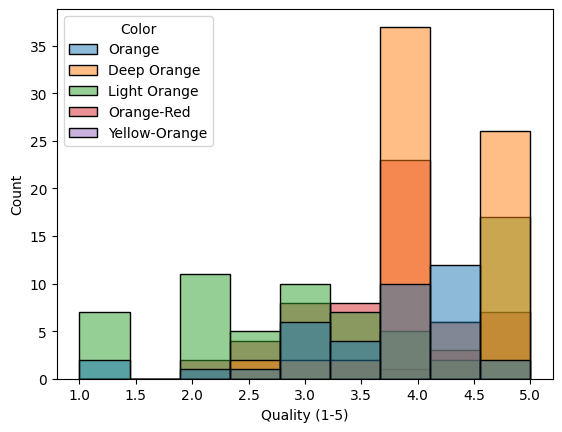

In [22]:
sns.histplot(data = df, x = "Quality (1-5)", hue = "Color")

# dados matplotlib and Seaborn

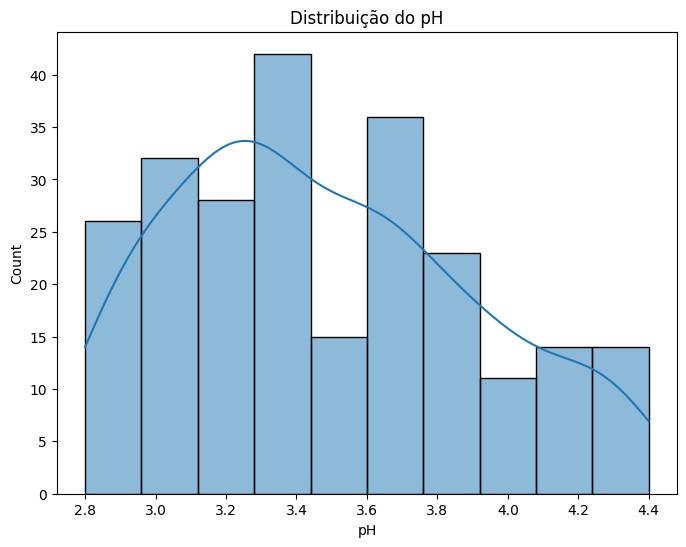

In [23]:
plt.figure(figsize=(8, 6))
sns.histplot(df["pH (Acidity)"], bins=10, kde=True)
plt.title("Distribuição do pH")
plt.xlabel("pH")
plt.show()

_O histograma acima nos mostrando a distribuição da contagem das laranjas em relação a acidez da laranja "pH (Acidity)"._

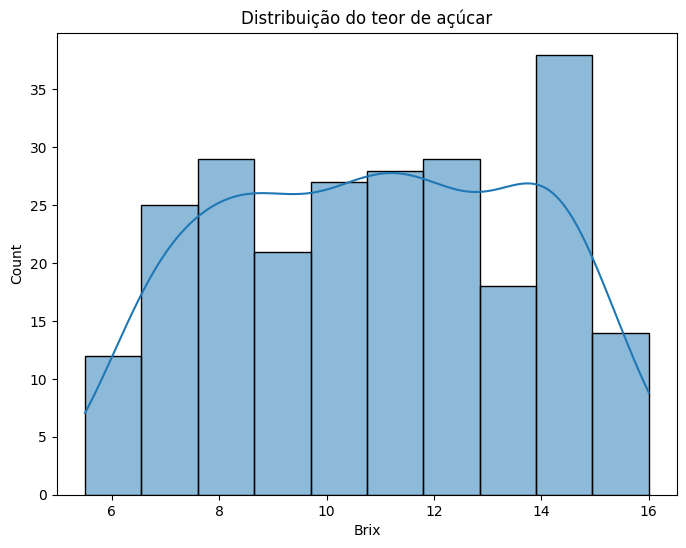

In [24]:
plt.figure(figsize=(8, 6))
sns.histplot(df["Brix (Sweetness)"], bins=10, kde=True)
plt.title("Distribuição do teor de açúcar")
plt.xlabel("Brix")
plt.show()

_O histograma acima nos mostrando a distribuição da contagem das laranjas em relação ao teor de açúcar das laranjas "Brix (Sweetness)"._

# dados Pandas e matplotlib

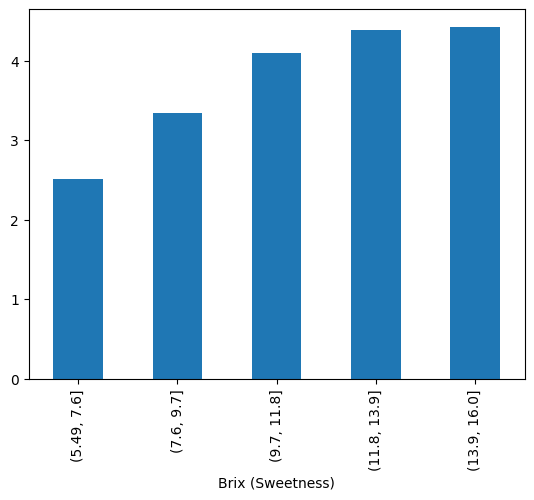

In [25]:
df.groupby(pd.cut(df['Brix (Sweetness)'], bins=5))['Quality (1-5)'].mean().plot(kind='bar')
plt.show()

_O gráfico de barra acima nos mostra como a média da qualidade da laranja "Quality (1-5)" varia de acordo com o teor de açúcar "Brix (Sweetness)"._

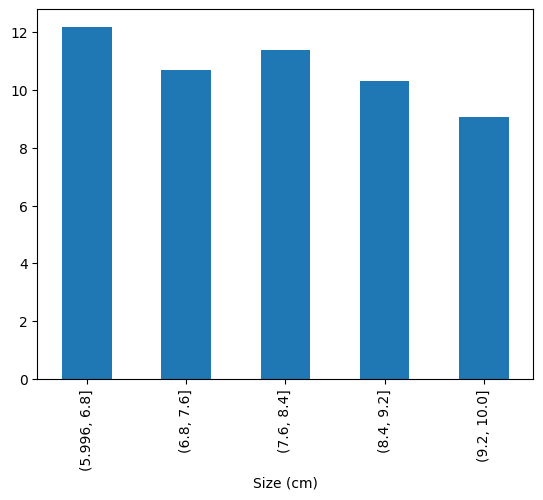

In [26]:
df.groupby(pd.cut(df['Size (cm)'], bins=5))['Brix (Sweetness)'].mean().plot(kind='bar')
plt.show()

_O gráfico de barra acima nos mostra como a média do teor de açucar da laranja "Brix (Sweetness)" varia de acordo com o tamanho da laranja "Size (cm)"._

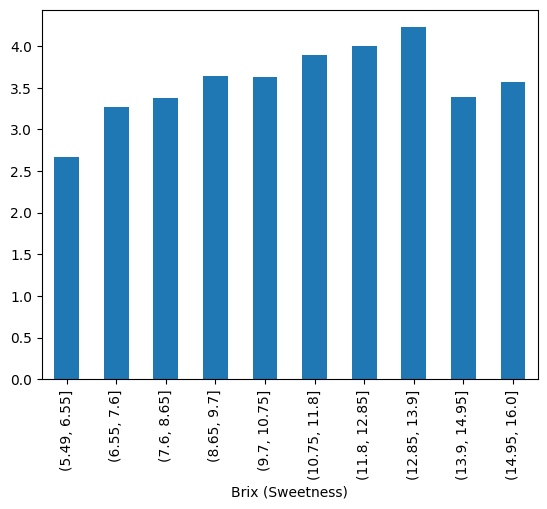

In [27]:
df.groupby(pd.cut(df['Brix (Sweetness)'], bins=10))['Ripeness (1-5)'].mean().plot(kind='bar')
plt.show()

_O gráfico de barra acima nos mostra como a média do teor de açucar da laranja "Brix (Sweetness)" varia de acordo com a maturação da laranja "Ripeness (1-5)"._

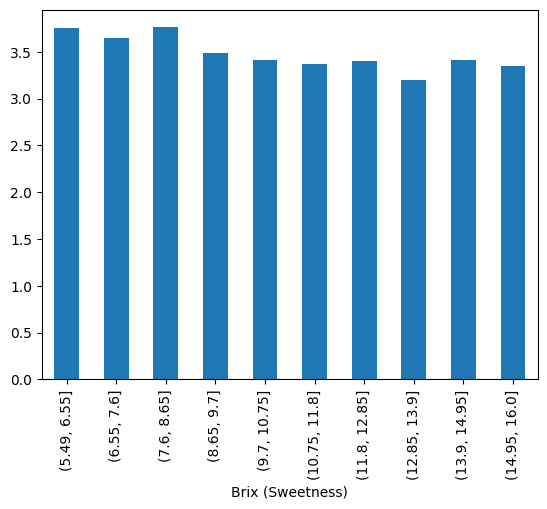

In [28]:
df.groupby(pd.cut(df['Brix (Sweetness)'], bins=10))['pH (Acidity)'].mean().plot(kind='bar')
plt.show()

_O gráfico de barra acima nos mostra como a média do teor de açucar da laranja "Brix (Sweetness)" varia de acordo com a acidez da laranja "pH (Acidity)"._

## 2. Perguntas de partida e hipóteses

- O que está relacionado com a doçura?
- O que torna a fruta mais doce?

## 3. Insights

- A qualidade da Laranjá está diretamente proporicional a sua doçura.
- Talvez tenha alguma relação entre a maturação e a doçura, segundo o gráfico que correlaciona as 2 colunas.
